Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [229]:
# your code here
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates
%matplotlib inline

db_filename = "dinofunworld.db"
connect = sqlite3.connect(db_filename)
cursor = connect.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables_names = cursor.fetchall()
print(tables_names)
for name in tables_names:
    cursor.execute(f"SELECT * FROM {name[0]}")
    table_cols = [description[0] for description in cursor.description]
    print(table_cols)

[('checkin',), ('attraction',), ('sequences',)]
['index', 'visitorID', 'timestamp', 'attraction', 'duration', 'type']
['index', 'AttractionID', 'Name', 'Region', 'Category', 'type']
['index', 'visitorID', 'sequence']


### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [231]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
cursor.execute("SELECT visitorID, sequence FROM sequences WHERE visitorID in (165316, 1835254, 296394, 404385, 448990)")
sequence = cursor.fetchall()
# dist_matrix = {}
# checked = []
# for i in range(len(sequence)):
#     curr_id = sequence[i][0]
#     curr_sequence = sequence[i][1]
#     sub_dict = {}
#     for j in range(i+1, len(sequence)):
#         next_id = sequence[j][0]
#         next_sequence = sequence[j][1]
#         if j < len(sequence) and curr_id != next_id:
            
#             sequence1_pruned = np.asarray([int(k) for k in curr_sequence.split('-')])
#             sequence2_pruned = np.asarray([int(k) for k in next_sequence.split('-')])
#             sub_dict[next_id] = np.sum(abs(np.subtract(sequence1_pruned, sequence2_pruned)) != 0).tolist()
#             dist_matrix[curr_sequence] = sub_dict
# print(dist_matrix)

dist_matrix = {}
checked = []
for i in range(len(sequence)):
    sub_dict = {}
    main_id_key = sequence[i][0]
    for j in range(len(sequence)):
        sub_id_key = sequence[j][0]
        if main_id_key != sub_id_key:
            sequence1_pruned = np.asarray([int(k) for k in sequence[i][1].split('-')])
            sequence2_pruned = np.asarray([int(k) for k in sequence[j][1].split('-')])
            sub_dict[sub_id_key] = np.sum(abs(np.subtract(sequence1_pruned, sequence2_pruned)) != 0).tolist()
            dist_matrix[main_id_key] = sub_dict
print(dist_matrix)

{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

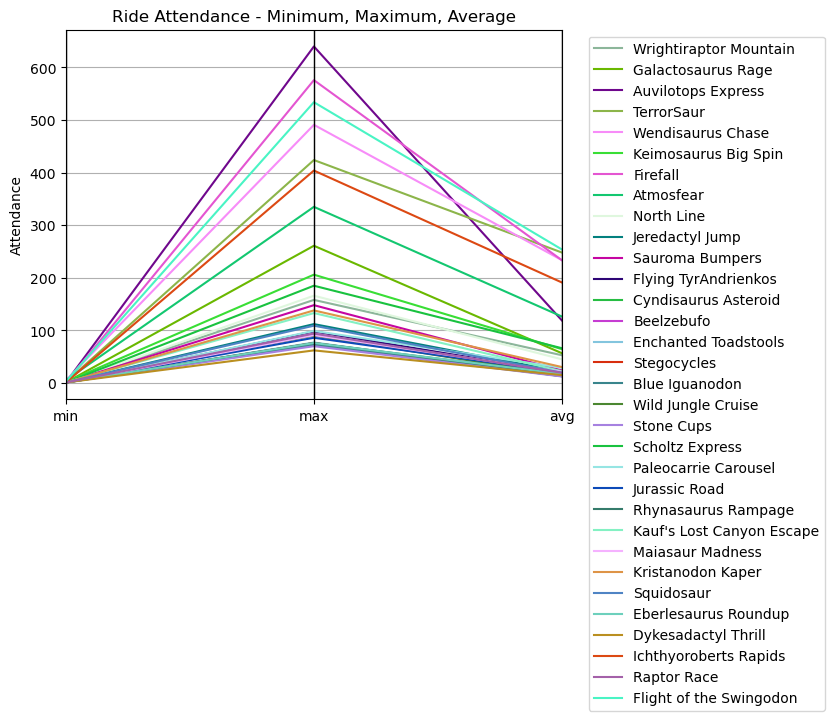

In [294]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
rides = cursor.execute("SELECT AttractionID, Name FROM attraction WHERE Category LIKE '%Ride%'").fetchall()
sequences = cursor.execute("SELECT sequence FROM sequences").fetchall()
sequences = np.asarray([tup[0].split('-') for tup in sequences])
attendance = {}
for (idx, name) in rides:
    matches = np.sum(sequences == str(idx), axis = 0)
    minimum = np.min(np.where(matches != 0, matches, np.inf))
    maximum = np.max(matches)
    average = np.mean(matches)
    metrics = {'min': int(minimum), 'max': int(maximum), 'avg': float(average)}
    attendance[name] = metrics
print(attendance)
names_df = pd.DataFrame({'rides': attendance.keys()})
metrics_df = pd.DataFrame(attendance.values())
attendance_df = pd.concat([names_df,metrics_df], axis = 1)
parallel_coordinates(attendance_df, 'rides')
plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.ylabel("Attendance")
plt.title("Ride Attendance - Minimum, Maximum, Average")
plt.show()

### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

In [235]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
